# Amazon Prime Tv Shows and Movies

In [70]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import os 
import sys
import csv
import math

from collections import defaultdict, Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

pd.set_option('display.max_column', 100)
pd.set_option('display.max_row', 1000)

sb.set_style('darkgrid')
sb.set()

%matplotlib inline

In [71]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Amazon Prime TV Shows and Movies\titles.csv")
df.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


In [72]:
df.shape

(9871, 15)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [74]:
round(df.describe(), 2)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.00,9871.00,1357.00,8850.00,8840.00,9324.00,7789.00
mean,2001.33,85.97,2.79,5.98,8533.61,6.91,5.98
std,25.81,33.51,4.15,1.34,45920.15,30.00,1.52
min,1912.00,1.00,1.00,1.10,5.00,0.00,0.80
25%,1995.50,65.00,1.00,5.10,117.00,1.23,5.10
50%,2014.00,89.00,1.00,6.10,462.50,2.54,6.00
75%,2018.00,102.00,3.00,6.90,2236.25,5.63,6.90
max,2022.00,549.00,51.00,9.90,1133692.00,1437.91,10.00


In [75]:
df.isnull().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

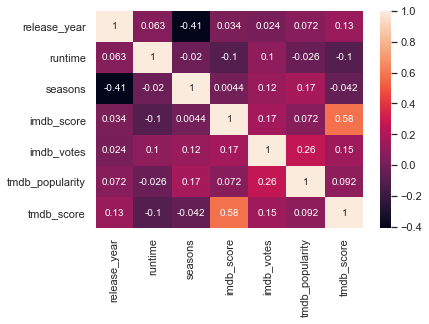

In [76]:
sb.heatmap(df.corr(), annot = True)

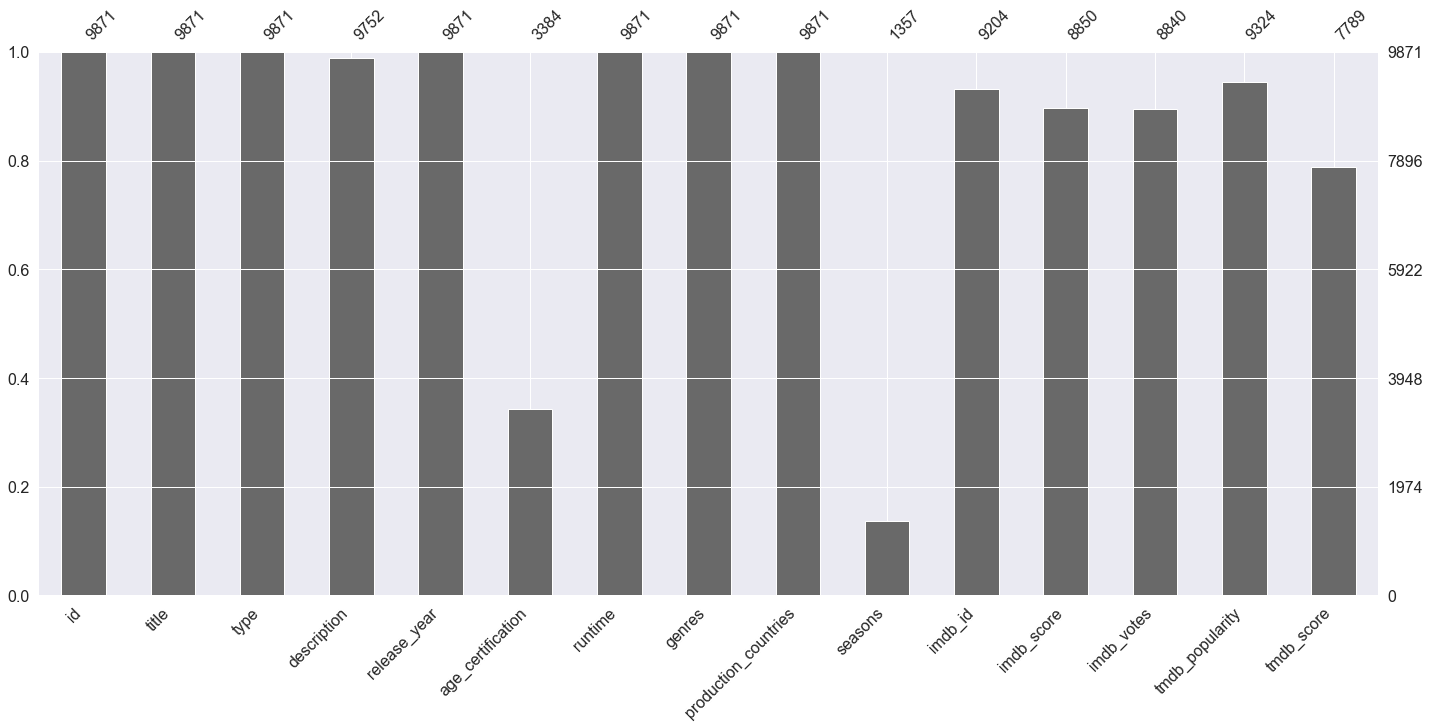

In [77]:
msno.bar(df)

In [78]:
(np.mean(df['seasons']))

2.791451731761238

In [79]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


### Feature Engineering

In [80]:
# Using the TF-IDF to convert the description series to a document term matrix
tfidf = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1,3), min_df=3, max_features=None)

df['description'] = df['description'].fillna('')

desc = tfidf.fit_transform(df['description'])

In [81]:
# Using the Sigmoid Kernel to get the relationship between actual and predicted values

sig = sigmoid_kernel(desc, desc)

indices = pd.Series(df.index, df['title']).drop_duplicates()


In [82]:
sig[indices['The General']]

array([0.76159416, 0.76161897, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [83]:
def movie_recommender(title, sig=sig):
    idx = indices[title]
    
    list_ind = list(enumerate(sig[idx]))
    
    sort_ind = sorted(list_ind, key = lambda x: x[1])
    
    top_ten = sort_ind[1:10]
    
    mov_rec = [x[0] for x in top_ten]
    
    return df['title'].iloc[mov_rec]

In [88]:
movie_recommender('Roommate')

1                                          The General
2                          The Best Years of Our Lives
4                                    In a Lonely Place
5                                           Stagecoach
6                                It's a Wonderful Life
8                                       My Man Godfrey
10    Intolerance: Love's Struggle Throughout the Ages
11                                        The Stranger
13                                  Tell Your Children
Name: title, dtype: object

In [87]:
df['title'].tail(50)

9821         Chhote Ustaad-Precaution Is Better Than Cure
9822                                    Carol's Christmas
9823                                         Daddydelphia
9824    Trip to the Tax Paradise - Rumbo al Paraíso Fi...
9825                   The Green Force Mission 14th March
9826                                           Cool Daddy
9827                                             Hero 115
9828                                          Kabadadaari
9829                                              The Bid
9830                                       Angel Mountain
9831                                             Hal King
9832                              Ksheera Sagara Madhanam
9833                                      Aham Bhramhasmi
9834                             El Regreso de La Llorona
9835                                         27 September
9836                                  Attraction to Paris
9837                                     Chloe's Mountain
9838          